# Objective

Predict Diabetes or not

# import Data

In [41]:
import pandas as pd
import numpy as np

In [42]:
df= pd.read_csv(r"C:\Users\Chetan Habib\Desktop\Machine Learning\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [43]:
df.Outcome=df.Outcome.replace({0 : 'No'})

In [44]:
df.Outcome=df.Outcome.replace({1 : 'Yes'})

In [45]:
from sklearn.preprocessing import LabelEncoder
df=df.apply(LabelEncoder().fit_transform)
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,86,22,28,0,123,350,29,1
1,1,23,19,22,0,62,196,10,0
2,8,121,17,0,0,30,368,11,1


In [46]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,86,22,28,0,123,350,29,1
1,1,23,19,22,0,62,196,10,0
2,8,121,17,0,0,30,368,11,1
3,1,27,19,16,62,77,53,0,0
4,0,75,4,28,102,209,514,12,1
...,...,...,...,...,...,...,...,...,...
763,10,39,25,41,108,118,55,42,0
764,2,60,21,20,0,155,187,6,0
765,5,59,22,16,71,58,115,9,0
766,1,64,14,0,0,95,195,26,1


# Data Pre-Process

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   SkinThickness             768 non-null    int64
 4   Insulin                   768 non-null    int64
 5   BMI                       768 non-null    int64
 6   DiabetesPedigreeFunction  768 non-null    int64
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    int32
dtypes: int32(1), int64(8)
memory usage: 51.1 KB


In [48]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.843750,59.322917,21.264323,15.535156,42.417969,112.104167,230.515625,12.227865,0.348958
std,3.364678,30.510176,8.688687,13.111648,52.689353,59.651199,143.031938,11.712724,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,37.000000,16.000000,0.000000,0.000000,69.000000,113.750000,3.000000,0.000000
50%,3.000000,55.000000,22.000000,16.000000,8.500000,109.000000,208.500000,8.000000,0.000000
75%,6.000000,78.250000,27.000000,25.000000,80.250000,153.000000,349.250000,20.000000,1.000000
max,16.000000,135.000000,46.000000,50.000000,185.000000,247.000000,516.000000,51.000000,1.000000


In [49]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [50]:
import plotly.express as px

fig = px.pie(df,names='Outcome',color='Outcome',
             color_discrete_map={1:'red',
                                 0:'green'})
fig.show()

# Data Partiton

In [51]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = df.drop(['Outcome'],axis=1)
y = df[['Outcome']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=231)

# Model Building

In [52]:
#Import Tree Classifier model
from sklearn import tree

df= tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
df.fit(X_train,y_train)  

DecisionTreeClassifier()

# Plotting Tree

In [53]:
# Ploting Tree
import graphviz 
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [54]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
151,0,4,52,18,0,0,18,249,16
402,1,5,74,29,34,57,137,149,14
152,1,9,94,31,21,94,130,487,21
431,0,3,27,23,9,54,98,314,17
724,0,1,49,35,0,0,117,134,24


In [55]:
independent_variable = list(train.columns[1:])
independent_variable

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

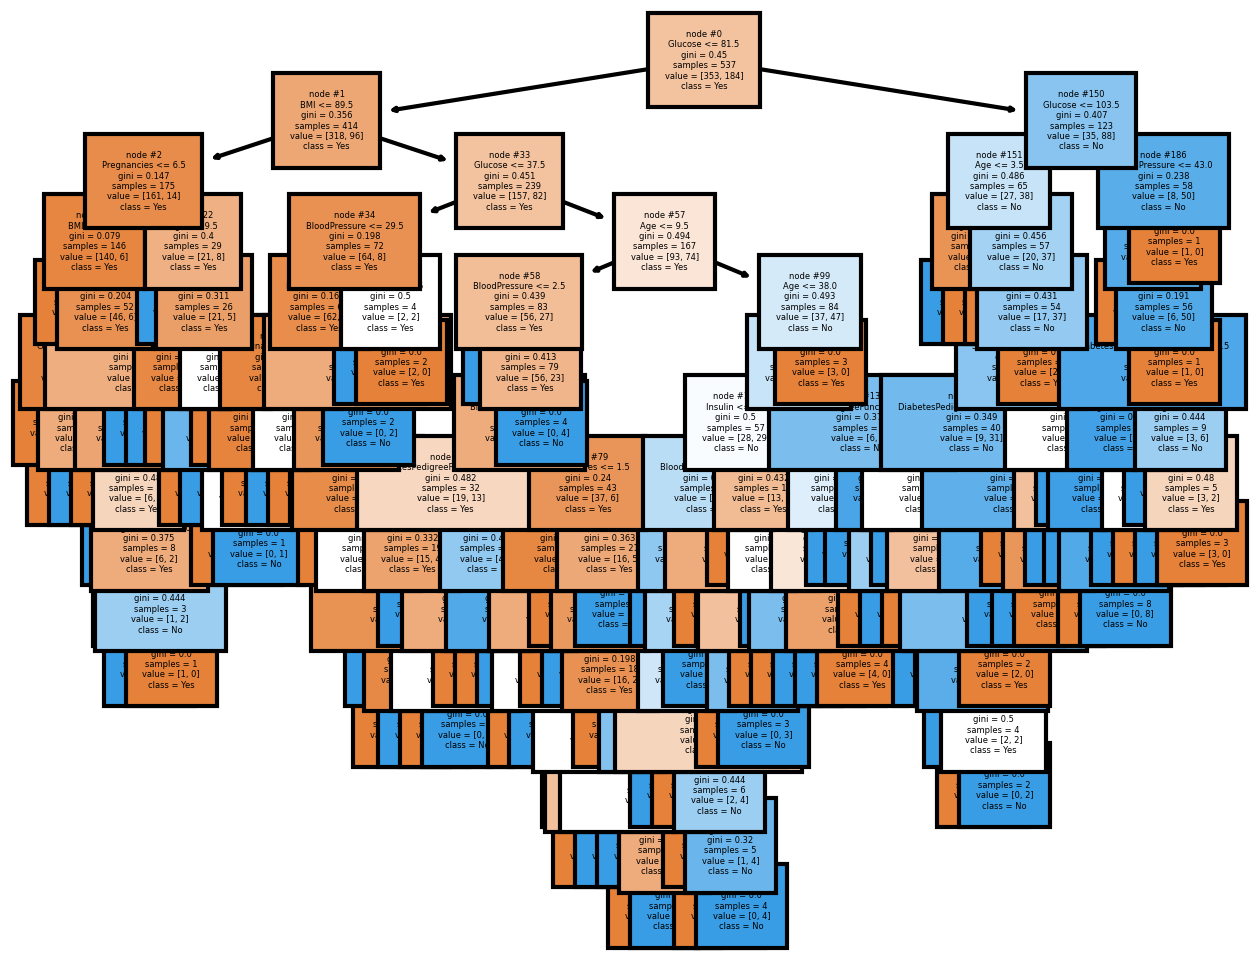

In [56]:
from sklearn import tree
import matplotlib.pyplot as plt

Outcome=['Yes','No']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(df,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Outcome, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

# Data Partition on train data

In [59]:
train['Predicted']=df.predict(X_train)  # MODEL = dt
train.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Predicted
151,0,4,52,18,0,0,18,249,16,0
402,1,5,74,29,34,57,137,149,14,1
152,1,9,94,31,21,94,130,487,21,1
431,0,3,27,23,9,54,98,314,17,0
724,0,1,49,35,0,0,117,134,24,0


# Model Performance

In [60]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Outcome'])
print(matrix)

[[353   0]
 [  0 184]]


In [61]:
353+184

537

In [62]:
Accuracy_Train=((353+184)/(537)*100)
print(Accuracy_Train)

100.0


In [63]:
from sklearn.metrics import classification_report
print(classification_report(train['Outcome'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       1.00      1.00      1.00       184

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



# Model Improvement by Pruning Method ( Cut Tree) 

In [64]:
#Import Tree Classifier model
from sklearn import tree

df = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=200, #parent 
                                 max_depth=3)  #branches
#Train the model using the training sets
df.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=200)

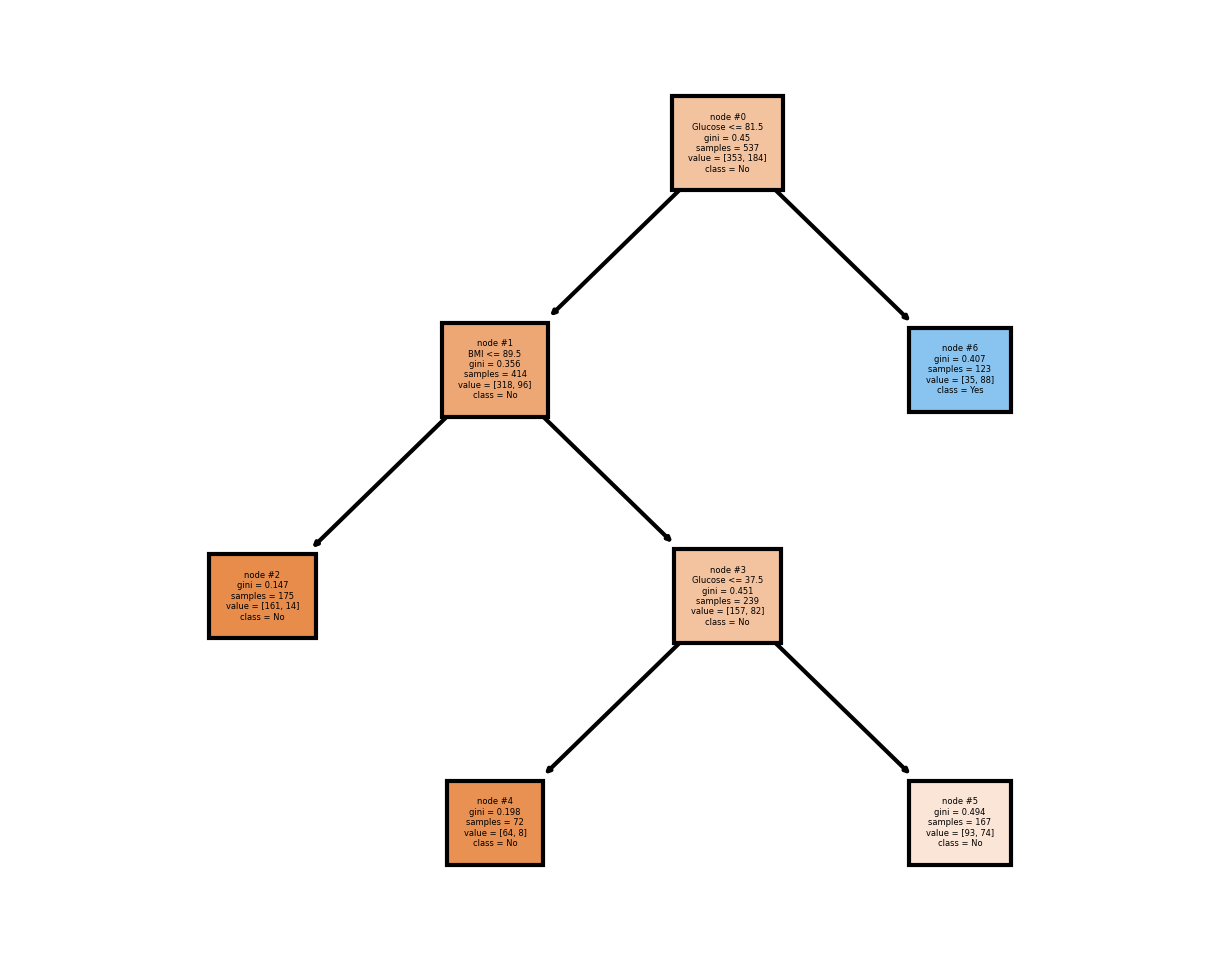

In [66]:
from sklearn import tree
import matplotlib.pyplot as plt

Outcome=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(df,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Outcome, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

In [68]:
train['Predicted']=df.predict(X_train)  # MODEL = dt
train.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Predicted
151,0,4,52,18,0,0,18,249,16,0
402,1,5,74,29,34,57,137,149,14,0
152,1,9,94,31,21,94,130,487,21,1
431,0,3,27,23,9,54,98,314,17,0
724,0,1,49,35,0,0,117,134,24,0


### Final accuracy of Model after Pruning

In [69]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Outcome'])
print(matrix)

[[318  96]
 [ 35  88]]


In [70]:
Accuracy_Train=((318+88)/(537)*100)
print(Accuracy_Train)

75.60521415270019


In [71]:
from sklearn.metrics import classification_report
print(classification_report(train['Outcome'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       353
           1       0.72      0.48      0.57       184

    accuracy                           0.76       537
   macro avg       0.74      0.69      0.70       537
weighted avg       0.75      0.76      0.74       537



# Prediction on test data

In [72]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
397,0,69,19,33,0,130,75,1,1
313,3,51,8,3,54,89,349,4,0
759,6,127,34,0,0,142,142,45,1
194,8,23,11,13,0,41,25,21,0
475,0,75,29,20,0,69,102,38,0


In [74]:
test['Predicted']=df.predict(X_test)
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted
397,0,69,19,33,0,130,75,1,1,0
313,3,51,8,3,54,89,349,4,0,0
759,6,127,34,0,0,142,142,45,1,1
194,8,23,11,13,0,41,25,21,0,0
475,0,75,29,20,0,69,102,38,0,0


# Model performance on test data

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Outcome'])
print(confusion_matrix)

[[132  46]
 [ 15  38]]


In [76]:
Accuracy_test=((132+38)/(231)*100)
Accuracy_test

73.59307359307358

#### Sensitivity & Specificity

Train

In [77]:
from sklearn.metrics import classification_report
print(classification_report(train['Outcome'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       353
           1       0.72      0.48      0.57       184

    accuracy                           0.76       537
   macro avg       0.74      0.69      0.70       537
weighted avg       0.75      0.76      0.74       537



Test

In [78]:
from sklearn.metrics import classification_report
print(classification_report(test['Outcome'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       147
           1       0.72      0.45      0.55        84

    accuracy                           0.74       231
   macro avg       0.73      0.68      0.68       231
weighted avg       0.73      0.74      0.72       231

